# DL PROJECT

# Predict sales by Analyzing Ad Budgets for different media channels

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


### Reading the CSV Files

In [2]:
train_df = pd.read_csv('D:\klu\kl 3rd yr 2nd sem\Deep Learning\Project\Dataset\Train.csv')
test_df = pd.read_csv('D:\klu\kl 3rd yr 2nd sem\Deep Learning\Project\Dataset\Test.csv')

### Preprocessing Steps

In [3]:
id = test_df.id

In [4]:
train_df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [5]:
train_df.isna().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

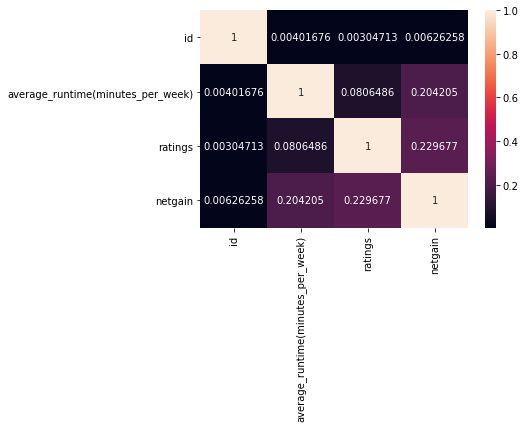

In [6]:
covMatrix = train_df.corr()
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [7]:
train_df.loc[train_df.airlocation=='Holand-Netherlands',:]

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
8494,32363,Never-married,ClassAction,Comedy,Male,30,Morning,Holand-Netherlands,0.027465,Low,No,False
25764,17205,Never-married,ClassAction,Comedy,Female,24,Morning,Holand-Netherlands,0.027465,Low,No,False


In [8]:
train_df = train_df.drop(train_df.index[[8494,25764]])

### Changing the Categorical values to Numerical values in the dataset

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
to_be_labeled_train = ['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee','netgain']
for column in to_be_labeled_train:
    train_df[column] = le.fit_transform(train_df[column])

to_be_labeled_test = ['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee']
for column in to_be_labeled_test:
    test_df[column] = le.fit_transform(test_df[column])

### Scaling all the values to small range

In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
columns = ['average_runtime(minutes_per_week)','ratings']
for col in columns:
    train_df[col+'_scaled'] = scale.fit_transform(np.array(train_df[col]).reshape(-1, 1))
    test_df[col+'_scaled'] = scale.fit_transform(np.array(test_df[col]).reshape(-1, 1))

In [11]:
train_df.drop(columns,axis=1,inplace=True)
train_df = train_df.drop(['id'],axis=1)
test_df.drop(columns,axis=1,inplace=True)
test_df = test_df.drop(['id'],axis=1)

In [12]:
train_df

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee,netgain,average_runtime(minutes_per_week)_scaled,ratings_scaled
0,3,0,0,1,2,38,0,0,0,0.377019,-0.148336
1,2,4,0,1,2,38,1,0,0,0.377019,-0.148336
2,0,2,0,0,2,38,0,1,0,0.377019,-0.148336
3,5,5,3,0,2,38,1,0,0,-0.023650,-0.148336
4,2,4,0,1,2,38,0,0,1,0.617421,-0.148336
...,...,...,...,...,...,...,...,...,...,...,...
26043,2,4,0,1,2,38,1,0,1,0.777688,-0.148336
26044,4,0,0,0,1,38,1,0,0,-0.023650,-0.148336
26045,2,3,0,0,2,38,1,0,1,-1.225657,0.837376
26046,4,0,0,0,1,38,1,1,0,0.617421,-0.148336


In [13]:
train_df = pd.get_dummies(train_df,columns=['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee'],drop_first=True)
test_df = pd.get_dummies(test_df,columns=['realtionship_status','industry','genre','targeted_sex','airtime','airlocation','expensive','money_back_guarantee'],drop_first=True)

In [14]:
train_df

,netgain,average_runtime(minutes_per_week)_scaled,ratings_scaled,realtionship_status_1,realtionship_status_2,realtionship_status_3,realtionship_status_4,realtionship_status_5,realtionship_status_6,industry_1,...,airlocation_34,airlocation_35,airlocation_36,airlocation_37,airlocation_38,airlocation_39,airlocation_40,expensive_1,expensive_2,money_back_guarantee_1
0,0,0.377019,-0.148336,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.377019,-0.148336,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0.377019,-0.148336,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,-0.023650,-0.148336,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0.617421,-0.148336,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,1,0.777688,-0.148336,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
26044,0,-0.023650,-0.148336,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
26045,1,-1.225657,0.837376,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
26046,0,0.617421,-0.148336,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [15]:
X = train_df.drop(['netgain'],axis=1)
y = train_df.netgain

### Splitting the dataset into training and test datasets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape

(17450, 63)

In [18]:
X_test.shape

(8596, 63)

## Building 1st ANN Model

In [19]:
model = Sequential()

model.add(Dense(32, input_dim=63, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=80, batch_size=50,validation_data=(X_test, y_test))

Train on 17450 samples, validate on 8596 samples
Epoch 1/80
17450/17450 [==============================] - 3s 158us/step - loss: 0.4652 - accuracy: 0.7487 - val_loss: 0.4030 - val_accuracy: 0.7792
Epoch 2/80
17450/17450 [==============================] - 1s 51us/step - loss: 0.4000 - accuracy: 0.7989 - val_loss: 0.3996 - val_accuracy: 0.7852
Epoch 3/80
17450/17450 [==============================] - 1s 51us/step - loss: 0.3906 - accuracy: 0.8049 - val_loss: 0.3885 - val_accuracy: 0.8063
Epoch 4/80
17450/17450 [==============================] - 1s 52us/step - loss: 0.3875 - accuracy: 0.8062 - val_loss: 0.3905 - val_accuracy: 0.8084
Epoch 5/80
17450/17450 [==============================] - 1s 52us/step - loss: 0.3842 - accuracy: 0.8061 - val_loss: 0.3795 - val_accuracy: 0.8078
Epoch 6/80
17450/17450 [==============================] - 1s 52us/step - loss: 0.3798 - accuracy: 0.8077 - val_loss: 0.3768 - val_accuracy: 0.8118
Epoch 7/80
17450/17450 [==============================] - 1s 51us/st

17450/17450 [==============================] - 1s 51us/step - loss: 0.3503 - accuracy: 0.8198 - val_loss: 0.3755 - val_accuracy: 0.8100
Epoch 57/80
17450/17450 [==============================] - 1s 49us/step - loss: 0.3498 - accuracy: 0.8197 - val_loss: 0.3782 - val_accuracy: 0.8072
Epoch 58/80
17450/17450 [==============================] - 1s 49us/step - loss: 0.3495 - accuracy: 0.8194 - val_loss: 0.3782 - val_accuracy: 0.8126
Epoch 59/80
17450/17450 [==============================] - 1s 49us/step - loss: 0.3493 - accuracy: 0.8201 - val_loss: 0.3777 - val_accuracy: 0.8105
Epoch 60/80
17450/17450 [==============================] - 1s 49us/step - loss: 0.3505 - accuracy: 0.8194 - val_loss: 0.3783 - val_accuracy: 0.8091
Epoch 61/80
17450/17450 [==============================] - 1s 49us/step - loss: 0.3491 - accuracy: 0.8206 - val_loss: 0.3752 - val_accuracy: 0.8106
Epoch 62/80
17450/17450 [==============================] - 1s 58us/step - loss: 0.3492 - accuracy: 0.8206 - val_loss: 0.3783

#### Test Accuracy

In [20]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy_train*100))
print('Loss : %.2f'%(loss_train*100))

17450/17450 [==============================] - 0s 26us/step
Accuracy: 82.72
Loss : 33.68


In [21]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy_test*100))
print('Loss : %.2f'%(loss_test*100))

8596/8596 [==============================] - 0s 23us/step
Accuracy: 80.74
Loss : 38.53


#### Graph between Test and Train Accuracy

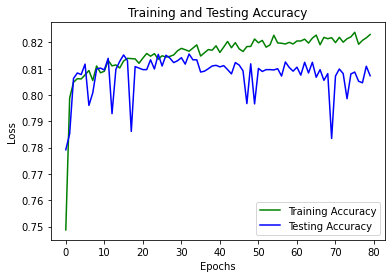

In [22]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']

epochs = range(0,80)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Building 2nd ANN Model with different Layers

In [23]:
model1 = Sequential()

model1.add(Dense(128, input_dim=63, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8,  activation='relu'))
model1.add(Dense(4,  activation='relu'))
model1.add(Dense(1,  activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

history1=model1.fit(X_train, y_train, epochs=80, batch_size=20,validation_data=(X_test, y_test))

Train on 17450 samples, validate on 8596 samples
Epoch 1/80
17450/17450 [==============================] - 3s 175us/step - loss: 0.4195 - accuracy: 0.7896 - val_loss: 0.3792 - val_accuracy: 0.8068
Epoch 2/80
17450/17450 [==============================] - 2s 134us/step - loss: 0.3835 - accuracy: 0.8013 - val_loss: 0.3736 - val_accuracy: 0.8115
Epoch 3/80
17450/17450 [==============================] - 2s 134us/step - loss: 0.3751 - accuracy: 0.8039 - val_loss: 0.3711 - val_accuracy: 0.8093
Epoch 4/80
17450/17450 [==============================] - 2s 132us/step - loss: 0.3732 - accuracy: 0.8091 - val_loss: 0.3766 - val_accuracy: 0.8111
Epoch 5/80
17450/17450 [==============================] - 2s 134us/step - loss: 0.3720 - accuracy: 0.8058 - val_loss: 0.3680 - val_accuracy: 0.8146
Epoch 6/80
17450/17450 [==============================] - 3s 145us/step - loss: 0.3687 - accuracy: 0.8104 - val_loss: 0.3739 - val_accuracy: 0.8107
Epoch 7/80
17450/17450 [==============================] - 3s 15

Epoch 56/80
17450/17450 [==============================] - 2s 131us/step - loss: 0.3325 - accuracy: 0.8270 - val_loss: 0.4043 - val_accuracy: 0.7954
Epoch 57/80
17450/17450 [==============================] - 2s 130us/step - loss: 0.3325 - accuracy: 0.8228 - val_loss: 0.3978 - val_accuracy: 0.8076
Epoch 58/80
17450/17450 [==============================] - 3s 145us/step - loss: 0.3299 - accuracy: 0.8274 - val_loss: 0.3955 - val_accuracy: 0.8075
Epoch 59/80
17450/17450 [==============================] - 2s 131us/step - loss: 0.3287 - accuracy: 0.8264 - val_loss: 0.4110 - val_accuracy: 0.8085
Epoch 60/80
17450/17450 [==============================] - 2s 132us/step - loss: 0.3298 - accuracy: 0.8287 - val_loss: 0.4137 - val_accuracy: 0.8037
Epoch 61/80
17450/17450 [==============================] - 2s 131us/step - loss: 0.3285 - accuracy: 0.8295 - val_loss: 0.4102 - val_accuracy: 0.8032
Epoch 62/80
17450/17450 [==============================] - 2s 132us/step - loss: 0.3279 - accuracy: 0.8273

In [24]:
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy1*100))
print('Loss : %.2f'%(loss1*100))

8596/8596 [==============================] - 0s 23us/step
Accuracy: 80.64
Loss : 43.93


In [25]:
loss1_test, accuracy1_test = model1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy1_test*100))
print('Loss : %.2f'%(loss1_test*100))

8596/8596 [==============================] - 0s 23us/step
Accuracy: 80.64
Loss : 43.93


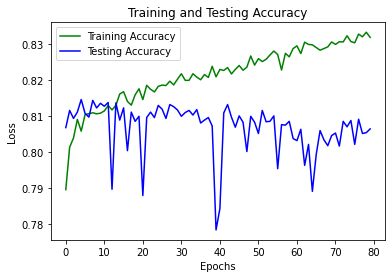

In [26]:
loss_train1 = history1.history['accuracy']
loss_val1 = history1.history['val_accuracy']

epochs = range(0,80)
plt.plot(epochs, loss_train1, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val1, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Building 3rd ANN Model with different Epochs

In [27]:
model2 = Sequential()

model2.add(Dense(128, input_dim=63, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8,  activation='relu'))
model2.add(Dense(4,  activation='relu'))
model2.add(Dense(1,  activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

history2=model2.fit(X_train, y_train, epochs=150, batch_size=20,validation_data=(X_test, y_test))

Train on 17450 samples, validate on 8596 samples
Epoch 1/150
17450/17450 [==============================] - 3s 197us/step - loss: 0.4097 - accuracy: 0.7927 - val_loss: 0.3793 - val_accuracy: 0.8019
Epoch 2/150
17450/17450 [==============================] - 3s 163us/step - loss: 0.3817 - accuracy: 0.8051 - val_loss: 0.3765 - val_accuracy: 0.8090
Epoch 3/150
17450/17450 [==============================] - 3s 159us/step - loss: 0.3780 - accuracy: 0.8055 - val_loss: 0.3721 - val_accuracy: 0.8099
Epoch 4/150
17450/17450 [==============================] - 2s 139us/step - loss: 0.3759 - accuracy: 0.8073 - val_loss: 0.3715 - val_accuracy: 0.8089
Epoch 5/150
17450/17450 [==============================] - 2s 133us/step - loss: 0.3740 - accuracy: 0.8108 - val_loss: 0.3703 - val_accuracy: 0.8124
Epoch 6/150
17450/17450 [==============================] - 2s 133us/step - loss: 0.3716 - accuracy: 0.8067 - val_loss: 0.3692 - val_accuracy: 0.8147
Epoch 7/150
17450/17450 [==============================] 

17450/17450 [==============================] - 2s 137us/step - loss: 0.3298 - accuracy: 0.8270 - val_loss: 0.4132 - val_accuracy: 0.8078
Epoch 56/150
17450/17450 [==============================] - 3s 149us/step - loss: 0.3315 - accuracy: 0.8236 - val_loss: 0.4048 - val_accuracy: 0.8068
Epoch 57/150
17450/17450 [==============================] - 2s 143us/step - loss: 0.3294 - accuracy: 0.8254 - val_loss: 0.4220 - val_accuracy: 0.8006
Epoch 58/150
17450/17450 [==============================] - 2s 138us/step - loss: 0.3297 - accuracy: 0.8254 - val_loss: 0.4087 - val_accuracy: 0.8041
Epoch 59/150
17450/17450 [==============================] - 2s 135us/step - loss: 0.3288 - accuracy: 0.8264 - val_loss: 0.4124 - val_accuracy: 0.8058
Epoch 60/150
17450/17450 [==============================] - 2s 135us/step - loss: 0.3259 - accuracy: 0.8287 - val_loss: 0.4205 - val_accuracy: 0.8022
Epoch 61/150
17450/17450 [==============================] - 2s 130us/step - loss: 0.3285 - accuracy: 0.8261 - val

17450/17450 [==============================] - 3s 155us/step - loss: 0.3051 - accuracy: 0.8368 - val_loss: 0.4732 - val_accuracy: 0.8033
Epoch 110/150
17450/17450 [==============================] - 2s 125us/step - loss: 0.3055 - accuracy: 0.8368 - val_loss: 0.5360 - val_accuracy: 0.8001
Epoch 111/150
17450/17450 [==============================] - 2s 132us/step - loss: 0.3062 - accuracy: 0.8360 - val_loss: 0.5263 - val_accuracy: 0.8036
Epoch 112/150
17450/17450 [==============================] - 3s 178us/step - loss: 0.3117 - accuracy: 0.8339 - val_loss: 0.5071 - val_accuracy: 0.8034
Epoch 113/150
17450/17450 [==============================] - 2s 140us/step - loss: 0.3061 - accuracy: 0.8379 - val_loss: 0.4794 - val_accuracy: 0.8039
Epoch 114/150
17450/17450 [==============================] - 2s 128us/step - loss: 0.3063 - accuracy: 0.8376 - val_loss: 0.4675 - val_accuracy: 0.8027
Epoch 115/150
17450/17450 [==============================] - 2s 133us/step - loss: 0.3049 - accuracy: 0.8357

In [28]:
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy2*100))
print('Loss : %.2f'%(loss2*100))

8596/8596 [==============================] - 0s 53us/step
Accuracy: 80.35
Loss : 52.91


In [29]:
loss2_test, accuracy2_test = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy2_test*100))
print('Loss : %.2f'%(loss2_test*100))

8596/8596 [==============================] - 0s 46us/step
Accuracy: 80.35
Loss : 52.91


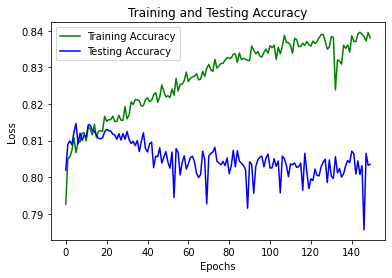

In [30]:
loss_train2 = history2.history['accuracy']
loss_val2 = history2.history['val_accuracy']

epochs = range(0,150)
plt.plot(epochs, loss_train2, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val2, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Comparision Between the Models

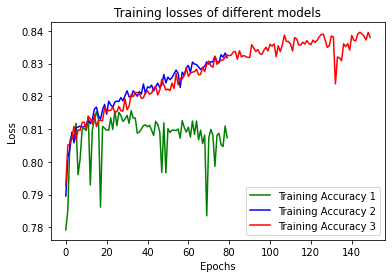

In [36]:
epochs1=range(0,80)
epochs = range(0,150)
plt.plot(epochs1, loss_val, 'g', label='Training Accuracy 1')
plt.plot(epochs1, loss_train1, 'b', label='Training Accuracy 2')
plt.plot(epochs, loss_train2, 'r', label='Training Accuracy 3')
plt.title('Training losses of different models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()